In [19]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from plotly import graph_objects as go
import matplotlib.pyplot as plt

## Importing the data

In [28]:
data_A = pd.read_parquet('../data/interim/PurpleAir MASTER realtime individual.parquet').drop(columns=['entry_id','UptimeMinutes','RSSI_dbm','lat','lon'])
print('Primary_A imported')
data_B = pd.read_parquet('../data/interim/PurpleAir B MASTER realtime individual.parquet').drop(columns=['entry_id','UptimeMinutes','IAQ','ADC','lat','lon'])
print('Primary_B imported')

Primary_A imported
Primary_B imported


In [47]:
fig = go.Figure()
name = 'PA_II_0D9C'

for sensor in data_A.index.unique('sensor_name'):
    intersect = data_A[sensor].index.intersection(data_B[sensor].index)
    plt.plot(data_A.loc[(sensor,),'PM2.5_ATM_ug/m3'],data_B.loc[(sensor+' B',),'PM2.5_ATM_ug/m3'],'.')


KeyError: 'PA_II_0D9C'

In [ ]:
# Display data for visual verification
display(data_A)
data_A.index.unique('sensor_name')
display(data_A.loc['PA_II_0D9C'])
display(data_B.loc['PA_II_0D9C B'])

In [33]:
display(data_B)
data_B.index.unique('sensor_name')

PM1.0_CF1_ug/m3  PM2.5_CF1_ug/m3  \
sensor_name  created_at                                                    
PA_II_0D9C B 2019-12-31 18:00:00-06:00             0.64             0.93   
             2019-12-31 18:02:00-06:00             0.65             0.93   
             2019-12-31 18:04:00-06:00              NaN              NaN   
             2019-12-31 18:06:00-06:00             0.97             1.28   
             2019-12-31 18:08:00-06:00             0.87             1.13   
...                                                 ...              ...   
PA_II_E6D8 B 2020-09-15 18:50:00-05:00             0.38             0.73   
             2020-09-15 18:52:00-05:00             0.00             0.29   
             2020-09-15 18:54:00-05:00             0.00             0.26   
             2020-09-15 18:56:00-05:00             0.00             0.20   
             2020-09-15 18:58:00-05:00             0.00             0.00   

                                        PM10.0_CF1_ug/m3  Pressure_hpa  \
sensor_name  created_at                                                  
PA_II_0D9C B 2019-12-31 18:00:00-06:00              1.20      1002.460   
             2019-12-31 18:02:00-06:00              1.16      1002.370   
             2019-12-31 18:04:00-06:00               NaN           NaN   
             2019-12-31 18:06:00-06:00              1.36      1002.365   
             2019-12-31 18:08:00-06:00              1.41      1002.380   
...                                                  ...           ...   
PA_II_E6D8 B 2020-09-15 18:50:00-05:00              0.73       994.770   
             2020-09-15 18:52:00-05:00              0.29       994.790   
             2020-09-15 18:54:00-05:00              0.26       994.800   
             2020-09-15 18:56:00-05:00              0.20       994.770   
             2020-09-15 18:58:00-05:00              0.45       994.750   

                                        PM2.5_ATM_ug/m3  
sensor_name  created_at                                  
PA_II_0D9C B 2019-12-31 18:00:00-06:00             0.93  
             2019-12-31 18:02:00-06:00             0.93  
             2019-12-31 18:04:00-06:00              NaN  
             2019-12-31 18:06:00-06:00             1.28  
             2019-12-31 18:08:00-06:00             1.13  
...                                                 ...  
PA_II_E6D8 B 2020-09-15 18:50:00-05:00             0.73  
             2020-09-15 18:52:00-05:00             0.29  
             2020-09-15 18:54:00-05:00             0.26  
             2020-09-15 18:56:00-05:00             0.20  
             2020-09-15 18:58:00-05:00             0.00  

[2797200 rows x 5 columns]

Index(['PA_II_0D9C B', 'PA_II_0DA2 B', 'PA_II_0DA8 B', 'PA_II_0E47 B',
       'PA_II_0E49 B', 'PA_II_0ED1 B', 'PA_II_6A1A B', 'PA_II_806B B',
       'PA_II_D44F B', 'PA_II_D71C B', 'PA_II_D727 B', 'PA_II_D8B6 B',
       'PA_II_D8BE B', 'PA_II_DA7A B', 'PA_II_E6D8 B'],
      dtype='object', name='sensor_name')

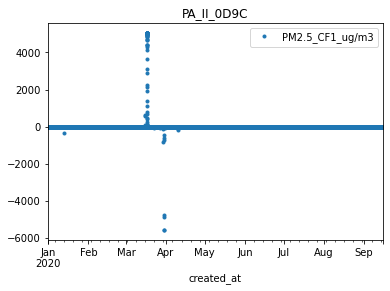

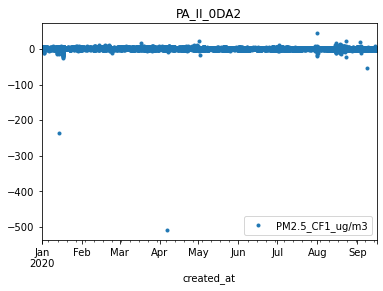

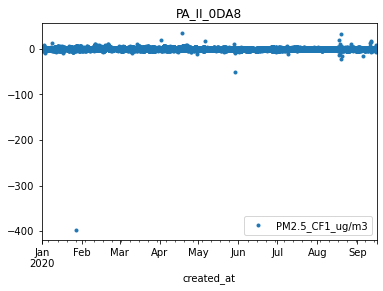

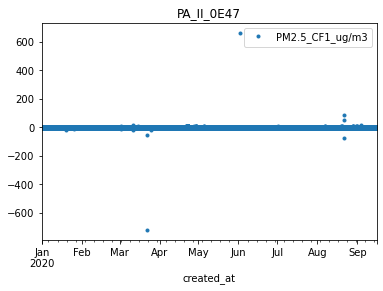

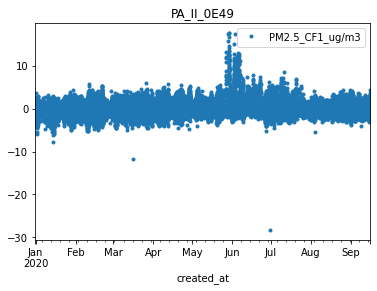

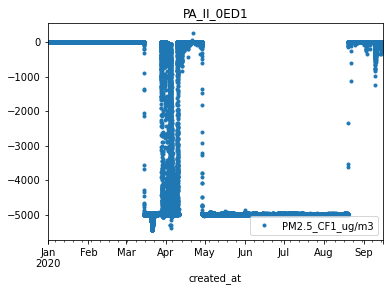

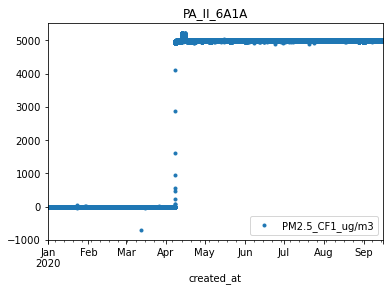

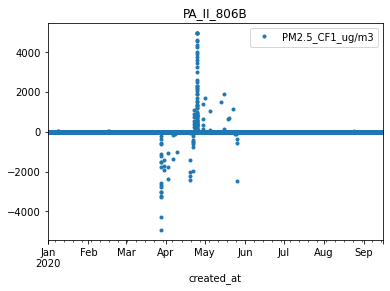

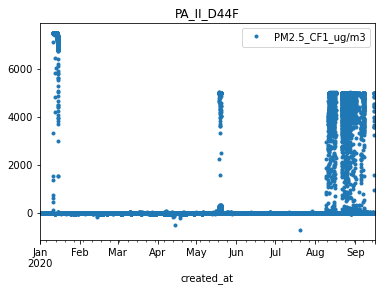

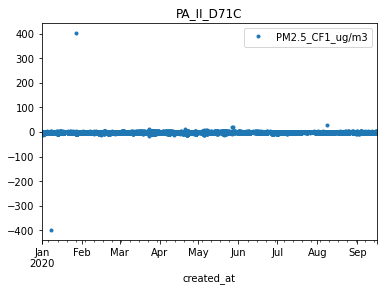

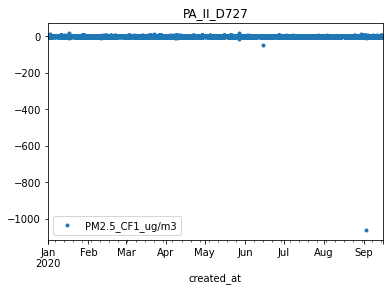

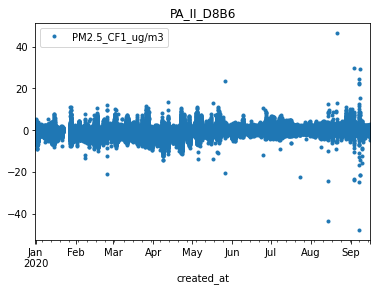

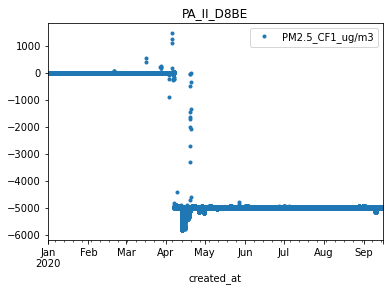

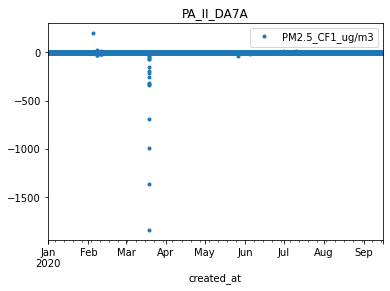

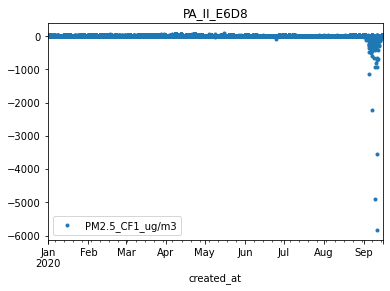

In [48]:
data_C = {}
for sensor in data_A.index.unique('sensor_name'):
    data_C[sensor] = (data_A.loc[sensor]-data_B.loc[f'{sensor} B']).copy()
    #data_C[sensor].plot(style=['.'],y='PM2.5_CF1_ug/m3',legend='True',figsize=(6,4),title=sensor, kind='line',ylim=(-20,20))
    data_C[sensor].plot(style=['.'],y='PM2.5_CF1_ug/m3',legend='True',figsize=(6,4),title=sensor, kind='line')


In [ ]:
#pd.options.plotting.backend = "plotly"

name = 'PA_II_0D9C'
display(data_C[name])
display(data_A.loc[name])
display(data_B.loc[name+' B'])

data_A.loc[name].resample('D').mean().plot().show()
data_B.loc[name+' B'].resample('D').mean().plot().show()

data_C[name].plot().show()
(data_C[name].copy()/data_B.loc[name+' B'].resample('D').mean().copy()).plot().show()

In [ ]:
data_c = data_B.loc[('PA_II_0D9C B','2020-07-01')]

In [ ]:
data_c = data_B.copy()
index = data_B.loc[('PA_II_0D9C B','2020-07-01')].index
data_c.loc[('PA_II_0D9C B',index)]=data_B.loc[('PA_II_0D9C B','2020-07-01')].resample('2min').mean().copy()


In [ ]:
data_B.loc[('PA_II_0D9C B','2020-07-01')].index

In [ ]:
data_B.loc[('PA_II_0D9C B',slice('2020-07-01 ','2020-07-02'))].resample('2min').mean().copy()


In [ ]:
data_A.loc['PA_II_0D9C'].index[0:10]

In [ ]:
ab = pd.infer_freq(data_A.loc['PA_II_0D9C'].index[0:3])
print(ab)

In [ ]:
pd.options.plotting.backend = "plotly"
for sensor in data_A.index.unique('sensor_name'):
    #data_A.drop(columns=['entry_id','UptimeMinutes', 'RSSI_dbm','lat','lon']).loc[(sensor,'2020')].resample('3D').mean().plot(title=sensor).show()
    data_A.loc[(sensor,'2020-03-20')].resample('5min').mean().plot(title=sensor).show()

    #data_B.drop(columns=['entry_id','UptimeMinutes','Pressure_hpa','lat','lon','ADC','IAQ']).loc[(f'{sensor} B','2020')].resample('3D').mean().plot(title=f'{sensor} B').show()
    data_B.loc[(f'{sensor} B','2020-03-20')].resample('5min').mean().plot(title=f'{sensor} B').show()
    
